# Shallow neural network on MNIST dataset.

This is a very simple notebook that creates a very shallow neural network trying to predict handwritten digits (0-9) with the popular MNIST dataset of Deep Learning.

In [72]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [31]:
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

In [44]:
x_valid.shape

(10000, 28, 28)

In [45]:
y_valid.shape

(10000,)

In [46]:
x_train.shape

(60000, 28, 28)

In [47]:
y_train.shape

(60000,)

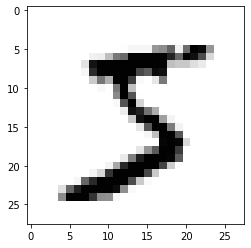

In [49]:
plt.imshow(x_train[0], cmap='Greys')

#### Preprocess Data 

In [56]:
x_train = x_train.reshape(60000, 784).astype('float32')
x_valid = x_valid.reshape(10000, 784).astype('float32')

In [57]:
x_train /= 255
x_valid /= 255

In [60]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [63]:
# Doing One-hot encoding
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [64]:
# sample one-hot encoded output
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#### Design Neural Network

In [68]:
model = Sequential()

# Hidden layer
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))

# output layer
model.add(Dense(10, activation='softmax'))

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


#### Compile model

In [73]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

#### Train model

In [74]:
model.fit(x_train, y_train, batch_size=128, epochs=200, verbose=1, 
          validation_data=(x_valid, y_valid))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0903 - accuracy: 0.1455 - val_loss: 0.0900 - val_accuracy: 0.1602
Epoch 2/200
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0897 - accuracy: 0.1738 - val_loss: 0.0894 - val_accuracy: 0.1898
Epoch 3/200
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0892 - accuracy: 0.1977 - val_loss: 0.0889 - val_accuracy: 0.2136
Epoch 4/200
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0888 - accuracy: 0.2177 - val_loss: 0.0885 - val_accuracy: 0.2325
Epoch 5/200
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0884 - accuracy: 0.2372 - val_loss: 0.0881 - val_accuracy: 0.2511
Epoch 6/200
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0880 - accuracy: 0.2610 - val_loss: 0.0878 - val_accuracy: 0.2803
Epoch 7/200
60000/60000 [=========================

Epoch 55/200
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0656 - accuracy: 0.6244 - val_loss: 0.0649 - val_accuracy: 0.6375
Epoch 56/200
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0651 - accuracy: 0.6297 - val_loss: 0.0644 - val_accuracy: 0.6429
Epoch 57/200
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0646 - accuracy: 0.6348 - val_loss: 0.0639 - val_accuracy: 0.6490
Epoch 58/200
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0641 - accuracy: 0.6398 - val_loss: 0.0634 - val_accuracy: 0.6534
Epoch 59/200
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0635 - accuracy: 0.6442 - val_loss: 0.0629 - val_accuracy: 0.6575
Epoch 60/200
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0630 - accuracy: 0.6490 - val_loss: 0.0623 - val_accuracy: 0.6622
Epoch 61/200
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0625 - ac

60000/60000 [==============================] - 1s 18us/sample - loss: 0.0431 - accuracy: 0.7666 - val_loss: 0.0422 - val_accuracy: 0.7768
Epoch 110/200
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0428 - accuracy: 0.7681 - val_loss: 0.0419 - val_accuracy: 0.7779
Epoch 111/200
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0425 - accuracy: 0.7694 - val_loss: 0.0416 - val_accuracy: 0.7786
Epoch 112/200
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0422 - accuracy: 0.7706 - val_loss: 0.0413 - val_accuracy: 0.7800
Epoch 113/200
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0420 - accuracy: 0.7719 - val_loss: 0.0410 - val_accuracy: 0.7809
Epoch 114/200
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0417 - accuracy: 0.7736 - val_loss: 0.0407 - val_accuracy: 0.7820
Epoch 115/200
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0414 - accuracy:

Epoch 163/200
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0316 - accuracy: 0.8415 - val_loss: 0.0306 - val_accuracy: 0.8500
Epoch 164/200
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0315 - accuracy: 0.8424 - val_loss: 0.0304 - val_accuracy: 0.8504
Epoch 165/200
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0313 - accuracy: 0.8430 - val_loss: 0.0303 - val_accuracy: 0.8512
Epoch 166/200
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0312 - accuracy: 0.8440 - val_loss: 0.0301 - val_accuracy: 0.8523
Epoch 167/200
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0310 - accuracy: 0.8446 - val_loss: 0.0300 - val_accuracy: 0.8526
Epoch 168/200
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0309 - accuracy: 0.8454 - val_loss: 0.0299 - val_accuracy: 0.8533
Epoch 169/200
60000/60000 [==============================] - 1s 17us/sample - loss: 0.03

In [75]:
model.evaluate(x_valid, y_valid)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.02607803156673908, 0.8684]

#### Performing inference

In [76]:
valid_0 = x_valid[0].reshape(1, 784)

In [77]:
model.predict(valid_0)

array([[4.2734155e-03, 8.6742028e-04, 2.6975558e-03, 6.1244098e-03,
        5.1018964e-03, 6.3574407e-03, 5.3362804e-04, 9.3943495e-01,
        2.3427911e-03, 3.2266479e-02]], dtype=float32)

In [78]:
model.predict_classes(valid_0)

array([7])